# Based on what you learned in Task 3, revisit HW2b by using XGBoost and SHAP, and develop a Jupyter Notebook tutorial for end-to-end explainable machine learning for the solubility prediction task.

In [1]:
# install xgboost, shap
!pip install xgboost shap
!pip install scikit-learn
!pip install rdkit-pypi

Defaulting to user installation because normal site-packages is not writeable
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data
data_root = "/home/ac7407/Machine_Learning/delaney-processed.csv"
delaney = pd.read_csv(data_root)

In [3]:
# check first five rows of data
delaney.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [4]:
# drop 'Compound ID' and 'smiles' column
delaney.drop(['Compound ID', 'smiles'], axis=1, inplace=True)

In [5]:
# split data into train and test sets (75%, 25%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(delaney.drop('measured log solubility in mols per litre', axis=1), delaney['measured log solubility in mols per litre'], test_size=0.25, random_state=42)

# verify length of each set
print('Training set length: ', len(X_train))
print('Test set length: ', len(X_test))

Training set length:  846
Test set length:  282


In [6]:
delaney.head()

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
0,-0.974,1,457.432,7,3,7,202.32,-0.77
1,-2.885,1,201.225,1,2,2,42.24,-3.30
2,-2.579,1,152.237,0,0,4,17.07,-2.06
3,-6.618,2,278.354,0,5,0,0.00,-7.87
4,-2.232,2,84.143,0,1,0,0.00,-1.33


In [7]:
# train XGBoost model
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [8]:
# generate predictions on the test data
y_pred = model.predict(X_test)

In [9]:
# calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rmse)

RMSE:  0.6538620366567606


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


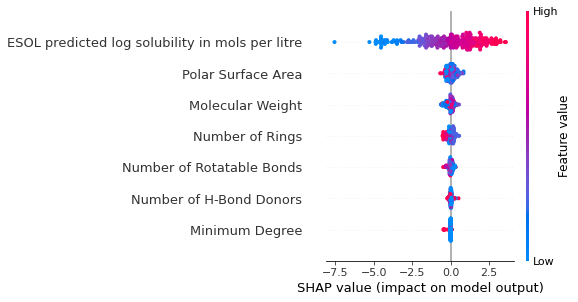

In [10]:
# use shap to explain model
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# plot shap values
shap.summary_plot(shap_values, X_test)